# Food time data

#### Life cycle of Machine learning Project

- understanding the Problem Statement 
- Data Collection 
- Data Checks to perform 
- Exploratory data analysis
- Data Pre-Processing 
- Model Training 
- Choose best Model

### 1) problem Satement

- his dataset aims to accurately predict food delivery times, considering a comprehensive set of features such as delivery personnel characteristics, environmental factors, and real-time conditions. Unlike existing models used by applications like Blinkit, Zomato, and Swiggy, this dataset integrates variables like weather, traffic, and vehicle type to create a holistic prediction framework

### 2) Data Collection 

- Data source- https://www.kaggle.com/datasets/gautamdeora7/food-delivery-time-a-multi-factor-dataset/data

- The data consists of 18 columns and 10001 rows.

### 2.1 Import Data and Required Packages

importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data\Food_Time_Data_Set.csv')

Show Top 5 row 

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Unnamed: 14,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,NaN,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,NaN,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,NaN,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,NaN,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,NaN,High,9.89,43.45


Shape of the datasets 

In [4]:
df.shape

(10001, 18)

## 2.2 Dataset information

- ID: Cantaining Dilivery unique id
- Delivery_person_ID: Cantaining all unique Delivery person id
- Delivery_person_Age: Age of all Delivery person
- Delivery_person_Ratings: tell's how satisfied individual person is
- Restaurant_latitude: latitude of resturant
- Restaurant_longitude: longitude of resturent
- Delivery_location_latitude: latitude of delivery location
- Delivery_location_longitude: logitude of delivery location
- Type_of_order: which type of food a person consume
- Type_of_vehicle: Delivery person mode of transportation
- temperature: temperature of delivery date 
- humidity: humidity of delivery date 
- perseption: as all the person has zero disabality
- weather_description: type of weather
- Unnamed: 14
- Traffic_Level: how Traffic they get based on each delivery
- Distance (km): based of km
- TARGET: predict how much time it will take for normal delivery person to reach their desired destination

### 3. Data Checks to perform 

- Check Missing values 
- Check Duplicates 
- Check data type 
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different catgorical column

### 3.1 Check Missing values 

In [5]:
df.isna().sum()

ID                                 1
Delivery_person_ID                 1
Delivery_person_Age                1
Delivery_person_Ratings            1
Restaurant_latitude                1
Restaurant_longitude               1
Delivery_location_latitude         1
Delivery_location_longitude        1
Type_of_order                      1
Type_of_vehicle                    1
temperature                        6
humidity                           6
precipitation                      6
weather_description                6
Unnamed: 14                    10001
Traffic_Level                    916
Distance (km)                    921
TARGET                           542
dtype: int64

Checking if the column cantain some meaning 

In [6]:
df[['Unnamed: 14','Traffic_Level','Distance (km)','TARGET']]

,Unnamed: 14,Traffic_Level,Distance (km),TARGET
0,NaN,Low,NaN,21.66666667
1,NaN,Very High,37.17,85.26666667
2,NaN,Low,3.34,28.58333333
3,NaN,Moderate,10.05,35.18333333
4,NaN,High,9.89,43.45
...,...,...,...,...
9996,NaN,High,18.92,32.61666667
9997,NaN,Low,2.64,12.01666667
9998,NaN,Very High,28.80,51.06666667
9999,NaN,High,17.63,43.8


In [7]:
df = df.drop(['ID','Delivery_person_ID','Unnamed: 14','precipitation'],axis ='columns')
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,weather_description,Traffic_Level,Distance (km),TARGET
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,haze,Low,NaN,21.66666667
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,mist,Very High,37.17,85.26666667
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,mist,Low,3.34,28.58333333
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,mist,Moderate,10.05,35.18333333
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,mist,High,9.89,43.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,32.0,4.2,22.310237,73.158921,22.400237,73.248921,Meal,motorcycle,23.96,64.0,haze,High,18.92,32.61666667
9997,36.0,4.7,17.483216,78.552111,17.493216,78.562111,Meal,motorcycle,22.94,60.0,haze,Low,2.64,12.01666667
9998,37.0,4.6,26.913987,75.752891,27.053987,75.892891,Buffet,scooter,23.72,31.0,clear sky,Very High,28.80,51.06666667
9999,29.0,4.7,18.994237,72.825553,19.084237,72.915553,Meal,scooter,28.01,57.0,smoke,High,17.63,43.8


In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
temperature                    0
humidity                       0
weather_description            0
Traffic_Level                  0
Distance (km)                  0
TARGET                         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9035 entries, 1 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          9035 non-null   float64
 1   Delivery_person_Ratings      9035 non-null   float64
 2   Restaurant_latitude          9035 non-null   float64
 3   Restaurant_longitude         9035 non-null   float64
 4   Delivery_location_latitude   9035 non-null   float64
 5   Delivery_location_longitude  9035 non-null   float64
 6   Type_of_order                9035 non-null   object 
 7   Type_of_vehicle              9035 non-null   object 
 8   temperature                  9035 non-null   float64
 9   humidity                     9035 non-null   float64
 10  weather_description          9035 non-null   object 
 11  Traffic_Level                9035 non-null   object 
 12  Distance (km)                9035 non-null   float64
 13  TARGET                 

#### Data cleaning is completed.

### 3.2 Check Duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicate values in the data set

### 3.3 Check data types

In [12]:
# check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9035 entries, 1 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          9035 non-null   float64
 1   Delivery_person_Ratings      9035 non-null   float64
 2   Restaurant_latitude          9035 non-null   float64
 3   Restaurant_longitude         9035 non-null   float64
 4   Delivery_location_latitude   9035 non-null   float64
 5   Delivery_location_longitude  9035 non-null   float64
 6   Type_of_order                9035 non-null   object 
 7   Type_of_vehicle              9035 non-null   object 
 8   temperature                  9035 non-null   float64
 9   humidity                     9035 non-null   float64
 10  weather_description          9035 non-null   object 
 11  Traffic_Level                9035 non-null   object 
 12  Distance (km)                9035 non-null   float64
 13  TARGET                 

### 3.4 Checking the number of unique values of each column

In [13]:
df.nunique()

Delivery_person_Age              22
Delivery_person_Ratings          28
Restaurant_latitude             388
Restaurant_longitude            388
Delivery_location_latitude     3375
Delivery_location_longitude    3375
Type_of_order                     4
Type_of_vehicle                   4
temperature                    1058
humidity                         64
weather_description              10
Traffic_Level                     5
Distance (km)                  2338
TARGET                         3387
dtype: int64

### 3.5 Check stastics of data set

In [14]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,Distance (km)
count,9035.000000,9035.000000,9035.000000,9035.000000,9035.000000,9035.000000,9035.000000,9035.000000,9035.000000
mean,29.512341,4.625744,18.873083,76.962812,18.936844,77.026573,22.623112,64.593470,14.275582
std,5.692078,0.323220,5.455782,3.546363,5.457840,3.546304,3.356308,15.373743,8.372376
min,15.000000,1.000000,9.957144,72.768726,9.967144,72.778726,6.770000,27.000000,1.550000
25%,25.000000,4.500000,12.983831,73.898520,13.062161,73.947902,19.940000,52.000000,7.610000
50%,29.000000,4.700000,19.055831,76.619103,19.113249,76.672278,22.860000,65.000000,13.400000
75%,34.000000,4.800000,22.750040,78.368855,22.815748,78.405883,25.000000,73.000000,19.590000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,29.050000,94.000000,59.840000


#### Insight 

- from above desription of numerical data, all means are very close to each other - between 4.6 and 77
- All standard deviation are also close - between 0.3 and 15.3
- While there is a minimum score of = 1.5

### 3.7 Exploring Data

In [15]:
df['TARGET'] = df['TARGET'].astype(float)

In [16]:
df.head().info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 1 to 5
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          5 non-null      float64
 1   Delivery_person_Ratings      5 non-null      float64
 2   Restaurant_latitude          5 non-null      float64
 3   Restaurant_longitude         5 non-null      float64
 4   Delivery_location_latitude   5 non-null      float64
 5   Delivery_location_longitude  5 non-null      float64
 6   Type_of_order                5 non-null      object 
 7   Type_of_vehicle              5 non-null      object 
 8   temperature                  5 non-null      float64
 9   humidity                     5 non-null      float64
 10  weather_description          5 non-null      object 
 11  Traffic_Level                5 non-null      object 
 12  Distance (km)                5 non-null      float64
 13  TARGET                       

In [17]:
print("Categories in 'order' variable:   ",end=' ')
print(df['Type_of_order'].unique())

print("Categories in 'vehicle' variable: ",end=" ")
print(df['Type_of_vehicle'].unique())

print("Categories in 'Weather' variable: ",end=" ")
print(df['weather_description'].unique())


Categories in 'order' variable:    ['Snack ' 'Drinks ' 'Buffet ' 'Meal ']
Categories in 'vehicle' variable:  ['scooter ' 'motorcycle ' 'electric_scooter ' 'bicycle ']
Categories in 'Weather' variable:  ['mist' 'broken clouds' 'clear sky' 'scattered clouds' 'overcast clouds'
 'haze' 'smoke' 'fog' 'few clouds' 'moderate rain']


In [18]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,weather_description,Traffic_Level,Distance (km),TARGET
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,mist,Very High,37.17,85.266667
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,mist,Low,3.34,28.583333
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,mist,Moderate,10.05,35.183333
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,mist,High,9.89,43.450000
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,Buffet,motorcycle,21.43,65.0,broken clouds,Moderate,11.30,30.600000


In [19]:
# define numerical and categorical columns 
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype =='O']

# print columns 
print(f'we have {len(numeric_feature)} numerical feature : {numeric_feature}')
print(f'we have {len(categorical_feature)} categorical feature : {categorical_feature}')

we have 10 numerical feature : ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'temperature', 'humidity', 'Distance (km)', 'TARGET']
we have 4 categorical feature : ['Type_of_order', 'Type_of_vehicle', 'weather_description', 'Traffic_Level']


### 3.8 Feature engineer 

- but all feature are unique and can't produce no new cColumns from them 
- and if you think like adding logitude and latitude would be benifit then read below 
- Adding them together combines these unrelated measures into a single number, which doesn't correspond to a real-world location or serve any meaningful geographic purpose.

# 4. Exploring Data (Visualisation)

### 4.1 Visualize average score distribution to make some conclusion 


- Histogram
- Kernal distribution Funtion (KDE)




### 4.1.1 Histogram and KDE

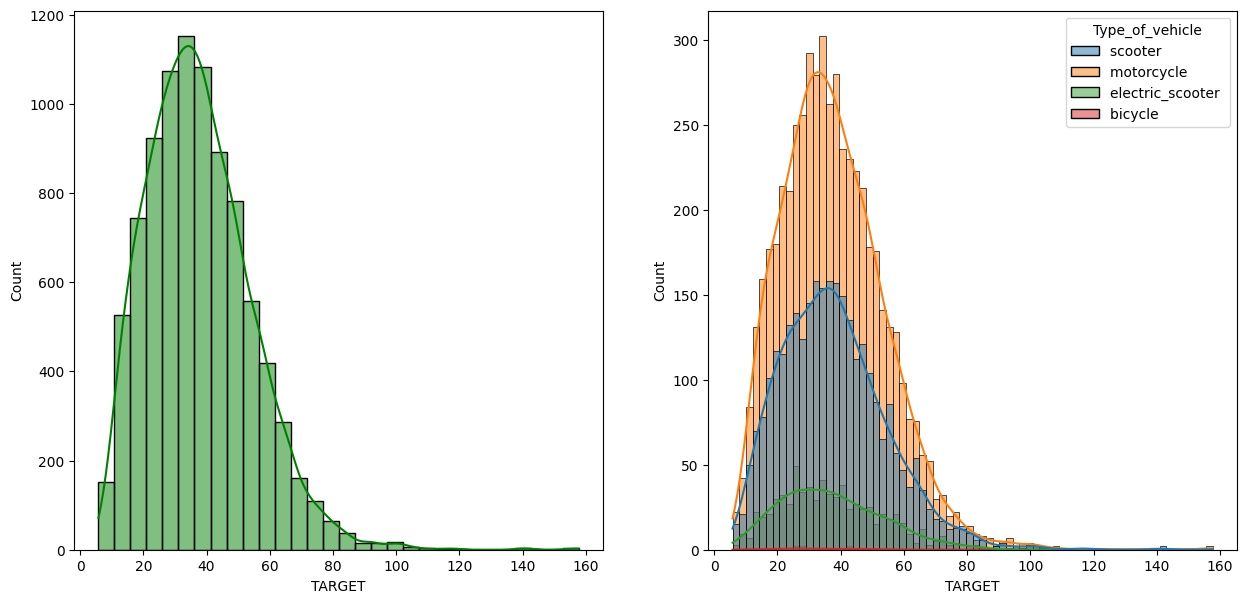

In [20]:
fig, axs= plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='TARGET', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='TARGET',kde=True,hue='Type_of_vehicle')
plt.show()


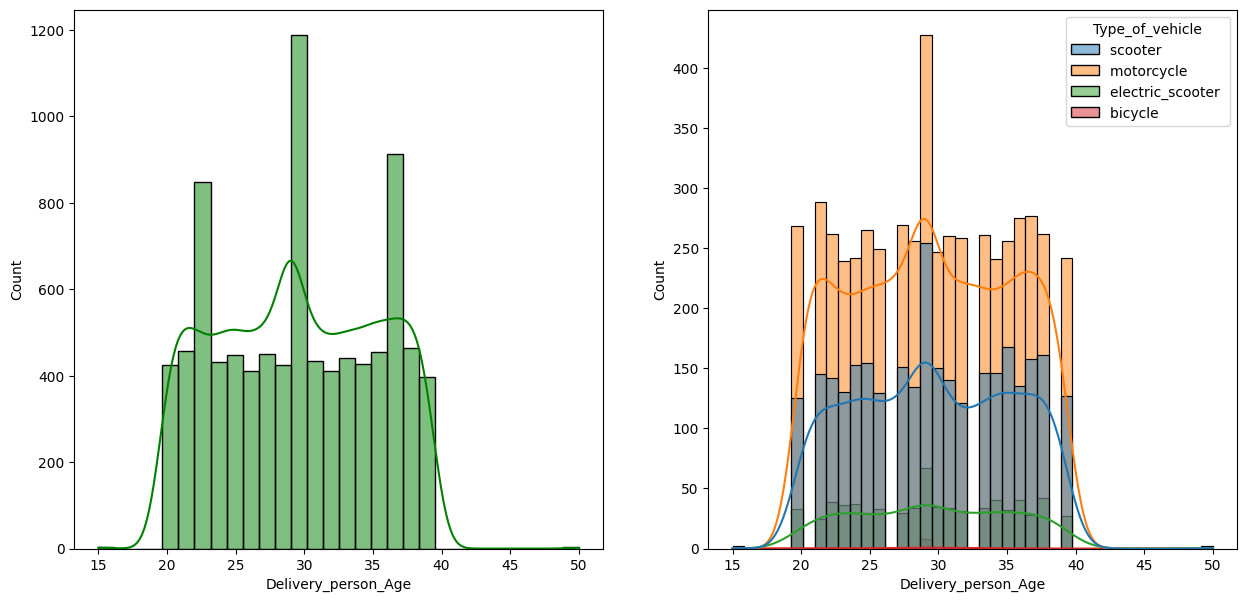

In [21]:
fig, axs= plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Delivery_person_Age', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Delivery_person_Age',kde=True,hue='Type_of_vehicle')
plt.show()


#### insights 

- person 30 to 40 perfoms well in motercycle in between 30
- maximum person that work are in between 18 to 38 
- motercycle > scotter > electric_scoter > bicycle

### 4.4 Multivariate analysis using pieplot

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

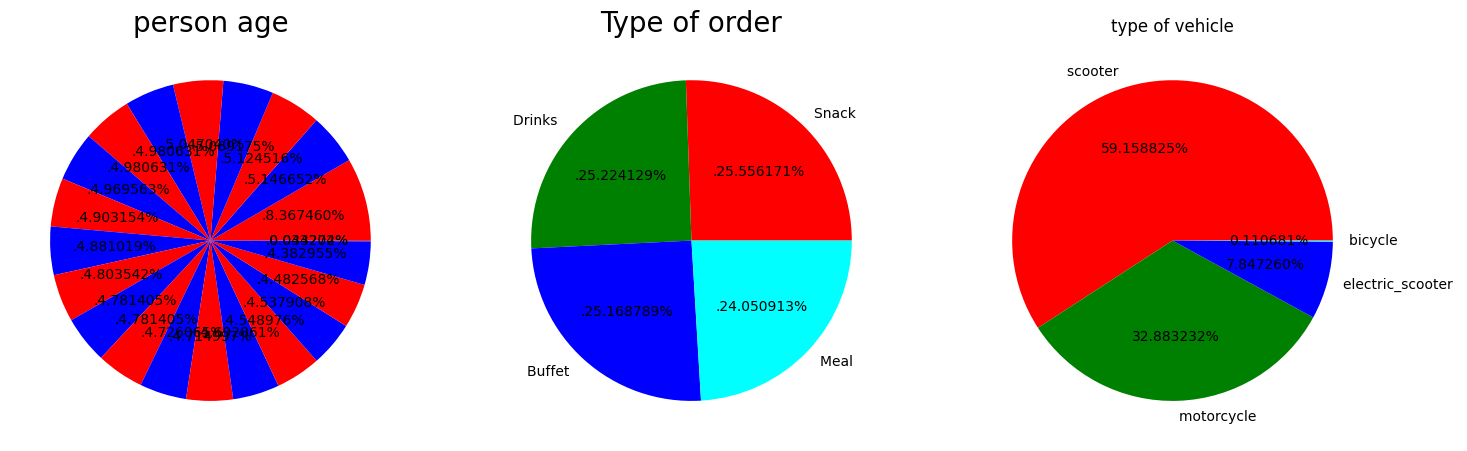

In [22]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Delivery_person_Age'].value_counts()
color = { 'red': df['Delivery_person_Age']<30, 'blue': df['Delivery_person_Age']>30}

plt.pie(size,colors=color,autopct = '.%2f%%')
plt.title('person age', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['Type_of_order'].value_counts()
labels = ['Snack ','Drinks ','Buffet ','Meal ']
color =['red', 'green', 'blue', 'cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct = '.%2f%%')
plt.title('Type of order', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['Type_of_vehicle'].value_counts()
label = ['scooter ','motorcycle ','electric_scooter ','bicycle ']
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors=color,labels=label,autopct= '%2f%%')
plt.title('type of vehicle')
plt.axis('off')

#### insights 

- Number of person age are equally divided 
- Number of order are more in snack
- Number of vehice person use for Delivery are more in scooter

In [23]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,weather_description,Traffic_Level,Distance (km),TARGET
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,mist,Very High,37.17,85.266667
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,mist,Low,3.34,28.583333
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,mist,Moderate,10.05,35.183333
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,mist,High,9.89,43.450000
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,Buffet,motorcycle,21.43,65.0,broken clouds,Moderate,11.30,30.600000


### 4.4 Feature Wise visualization 

#### 4.4.1 Delivery_person_Age

- How is distribution of Delivery person age? 
- is Age has any impact on student performance ?

### UNIVARIATE ANALYSIS (How is distribution of Delivery person Age ?)


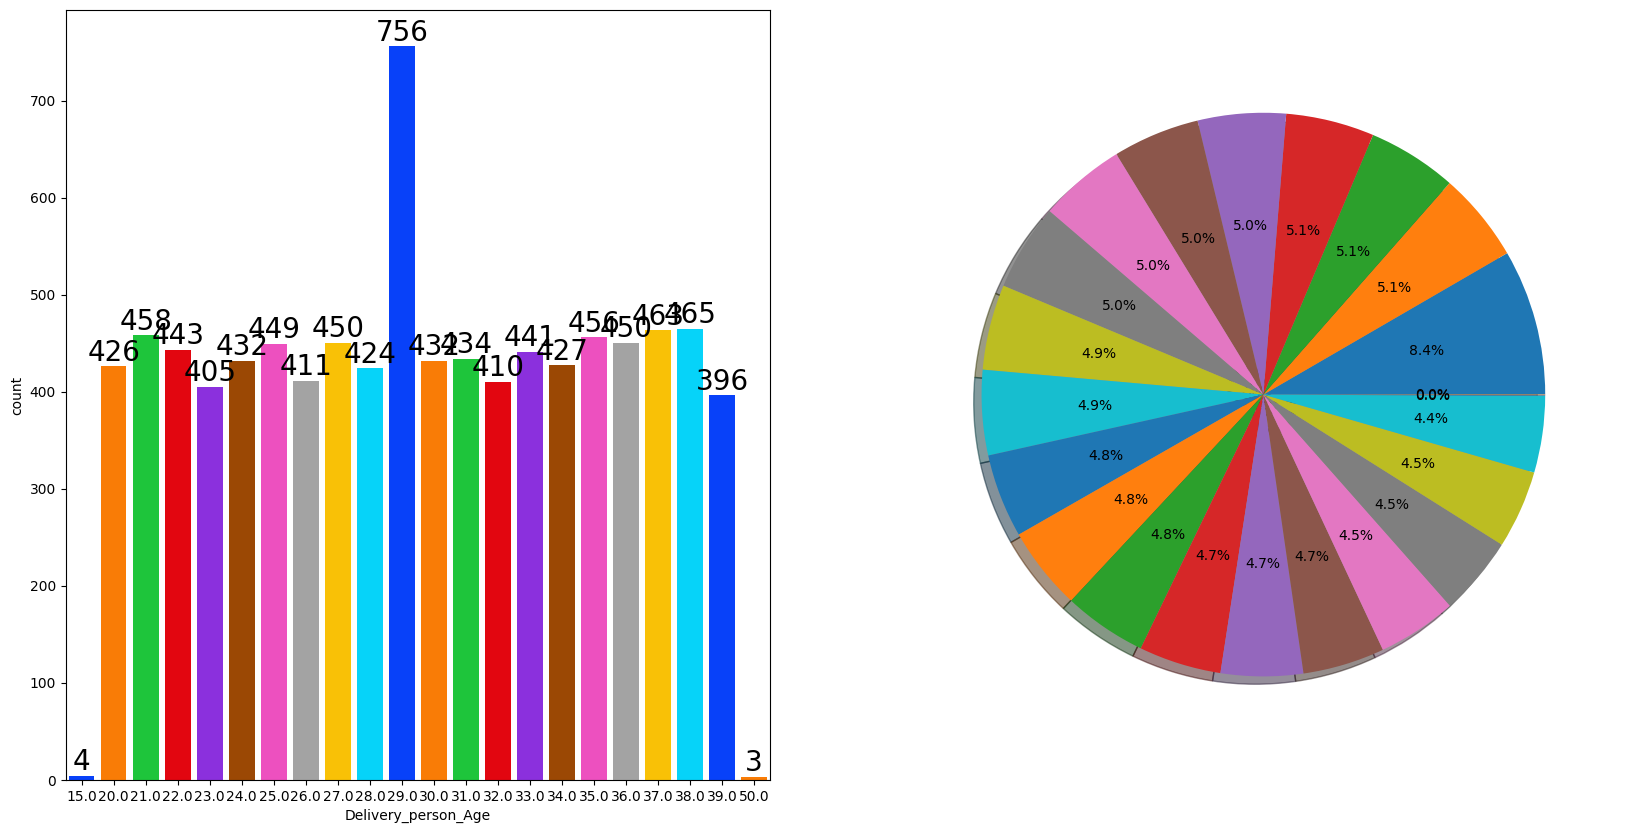

In [31]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Delivery_person_Age'], data = df, palette= 'bright',ax = ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['Delivery_person_Age'].value_counts(),autopct='%1.1f%%',shadow=True)
plt.show()

In [32]:
age_group = df['Delivery_person_Age'].mean()
age_group

np.float64(29.512340896513557)

#### Insights

- Number of people are between 29 to 30 (8.4 %) are more in Delivery job and peopler between 18 to 19 (4.4) are the minimum.

#### BIVARIATE ANALYSIS (is Age has any impact on Food Delivery Target's performance ?)

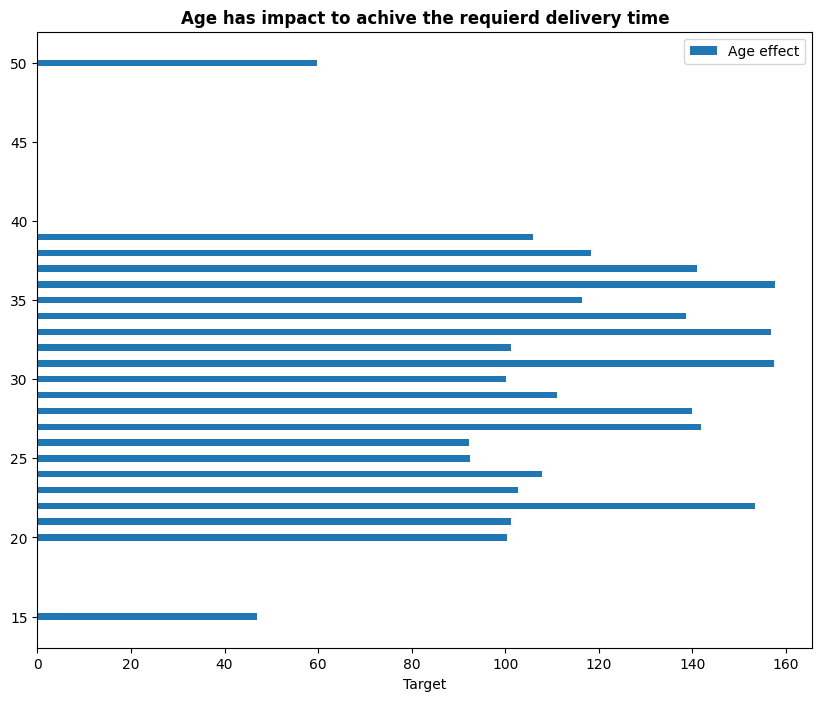

In [33]:
plt.figure(figsize=(10, 8))

plt.barh(df['Delivery_person_Age'], df['TARGET'], 0.4, label='Age effect')

plt.xlabel('Target')
plt.title("Age has impact to achive the requierd delivery time", fontweight='bold')
plt.legend()
plt.show()

#### insight 

- maximum people between 27 to 39 are maximum people who achived thier target.
- whereas peopler between 15 to 25 and 40 to 50 are people who achived less
number of target.

#### 4.4.2 Traffice column

- How traffic wise ditribution ?
- is Traffice affect on time ?

#### UNIVARIATE ANALYSIS (How is traffic wise distribution ?)

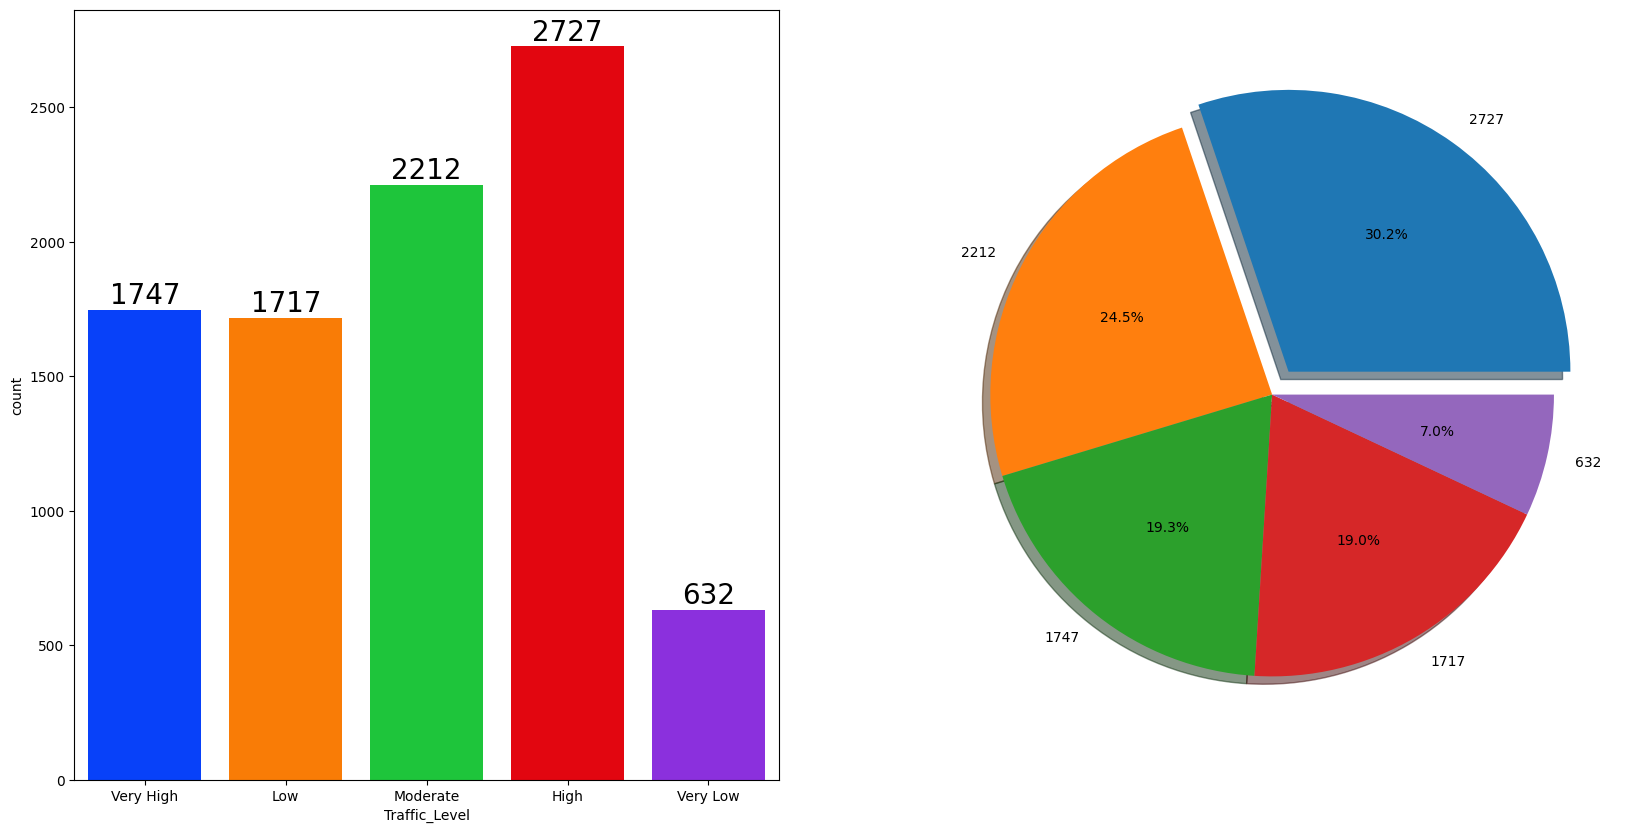

In [34]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Traffic_Level'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = df['Traffic_Level'].value_counts(),labels = df['Traffic_Level'].value_counts(),explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights

- Most of the Data belonging from High traffic (2727)
- Lowest number of Data belong to very Low traffic (632)

#### BIVARIATE ANALYSIS (is Traffice has any impact on Delivery Target ?)

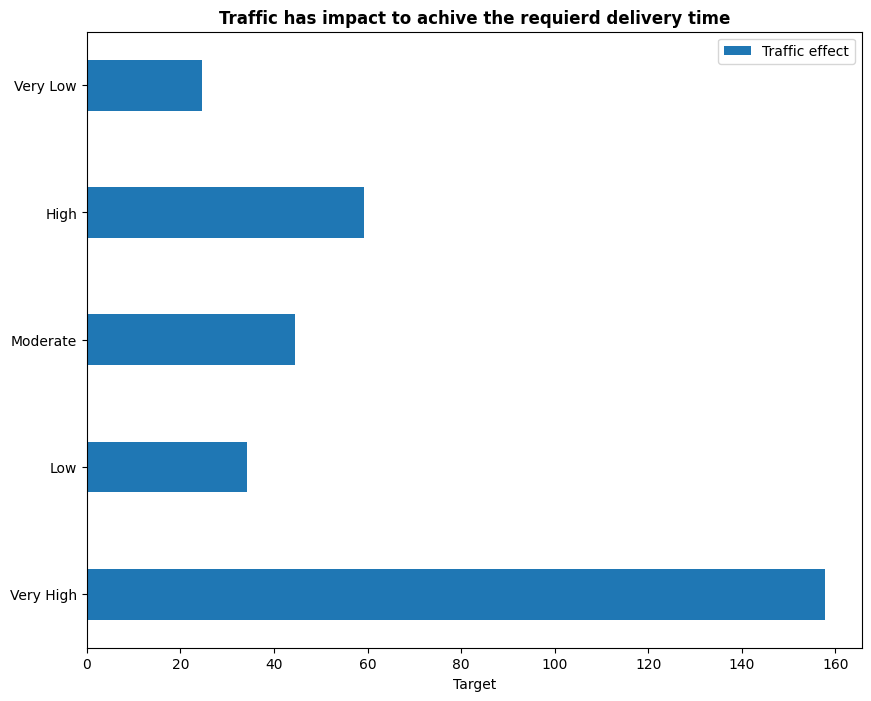

In [35]:
plt.figure(figsize=(10, 8))

plt.barh(df['Traffic_Level'], df['TARGET'], 0.4, label='Traffic effect')

plt.xlabel('Target')
plt.title("Traffic has impact to achive the requierd delivery time", fontweight='bold')
plt.legend()
plt.show()

#### Insights

- from the above plot show that very high amount of vey high traffice data cantain in given csv file.|

### 5. Conclusion 

- Food time data is related with Age, Traffice and type of vehicle
- type of vehicle mostly used are scotter.
- age upto 29 t 40 are perform betterin delivery.